<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skills_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GENERAL OVERVIEW OF DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load datasets
articles_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
authors_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

In [ ]:
articles_data = pd.read_csv('/content/articles.Dengue.csv')
authors_data = pd.read_csv('/content/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/paper_counts.csv')

In [ ]:
#Affiliation of institutes with the number of articles posted.

authors_data['AuthorAffiliation'] = authors_data['AuthorAffiliation'].fillna(method='ffill')
authors_data

authors_data.to_csv('author_data.csv')

authors1 = authors_data.groupby('AuthorAffiliation')['PMID'].count().reset_index()
authors2 = authors1.sort_values(by = 'PMID', ascending = False)
authors2.rename(columns= {'AuthorAffiliation' : 'Institute', 'PMID' : 'Number of articles published'})



,Institute,Number of articles published
12361,"Environmental Health Institute, National Envir...",77
12166,"Eijkman Institute for Molecular Biology, Jakar...",76
10675,"Department of Virology, Armed Forces Research ...",71
19766,"Novartis Institute for Tropical Diseases, Sing...",70
19992,"Oxford University Clinical Research Unit, Ho C...",64
...,...,...
13884,"Graduate University of Science and Technology,...",1
13885,"Graduate student, Computer Science , Rutgers U...",1
13886,"Graduation Program of Health Sciences, Faculty...",1
13887,"Graduação em Medicina Veterinária, Faculdade d...",1


In [ ]:
#Merging both the datasets
merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
merged_df.head(10)

#Selecting articles posted between 2018 and 2024
selected_rows = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
#SR_sort= selected_rows.sort_values(by = 'Year', ascending = False)
#SR_sort

#Top 10 institutes with the most number of publications in the last 5 years
Institute_article_counts = selected_rows.groupby(['AuthorAffiliation']).agg({'PMID': 'count'}).reset_index()
#Institute_article_counts
aad = Institute_article_counts.sort_values(by = 'PMID', ascending = False)
aad = aad.rename(columns ={'AuthorAffiliation' : 'Institute','PMID':'No. of articles published'})
aad.head(10)

,Institute,No. of articles published
7415,"Environmental Health Institute, National Envir...",73
4610,"Department of Medical Biotechnologies, Univers...",54
4723,"Department of Medical Oncology and Pneumology,...",38
6868,Division of Epidemiology and Communicable Dise...,38
2184,"Dengue Branch, Centers for Disease Control and...",38
4351,"Department of Integrative Biology, University ...",37
14380,"Unité de Virologie Structurale, Institut Paste...",35
7240,"Drug Discovery and Development Division, Patan...",35
15020,"Wadsworth Center, New York State Department of...",35
4331,Department of Infectomics and Molecular Pathog...,34


## WHO IS MOST ACTIVE

In [ ]:
# Total number of article contributions by an author

author_activity = authors_data.groupby(['AuthorForename', 'AuthorLastname']).size().reset_index(name='ArticleCount')
most_active_authors = author_activity.sort_values(by='ArticleCount', ascending=False)
most_active_authors


,AuthorForename,AuthorLastname,ArticleCount
10427,Eva,Harris,128
10046,Eng Eong,Ooi,66
5313,Cameron P,Simmons,66
1201,Alan L,Rothman,64
35526,Subhash G,Vasudevan,59
...,...,...,...
15615,Jarinee,Tongshoob,1
15614,Jarin,Taslem Mourosi,1
15613,Jared D,Pitts,1
15611,Jared,Tur,1


In [18]:
#find top 10 author contributions and create a viz
most_active_20 = most_active_authors.head(20)

#create a new column in df of author full name for easier distinguishing
most_active_20['Author Full Name'] = most_active_20['AuthorForename'] + ' ' + most_active_20['AuthorLastname']
most_active_20

#create pie chart of most active 20 authors of all time
import plotly.express as px
fig = px.pie(most_active_20, values='ArticleCount', names='Author Full Name')
fig.show()

<ipython-input-18-1a9b66855430>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



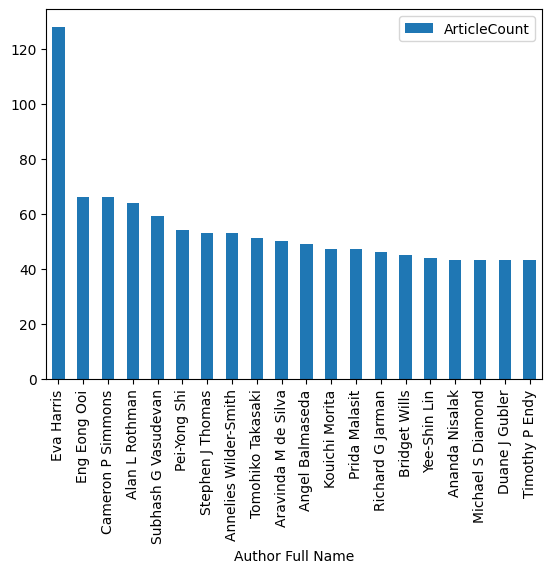

In [19]:
#create bar based on the top 10 most active authors of all time
articles_bar = most_active_20.plot.bar(x = "Author Full Name", y = "ArticleCount")

In [22]:
#Top 20 active reasearchers (based on number of articles published in the last 5 years)

#Merging both the datasets
merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
merged_df.head(20)


#Selecting articles posted between 2018 and 2024
selected_rows = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
#SR_sort= selected_rows.sort_values(by = 'Year', ascending = False)
#SR_sort

author_article_counts = selected_rows.groupby(['AuthorForename', 'AuthorLastname']).agg({'PMID': 'count'}).reset_index()
aac = author_article_counts.sort_values(by = 'PMID', ascending = False)
aac = aac.rename(columns ={'PMID':'No. of articles published'})
aac

top_20_articles = aac.head(20)
top_20_articles

,AuthorForename,AuthorLastname,No. of articles published
6022,Eva,Harris,38
6791,Gabriela,Paz-Bailey,35
20317,Stephen J,Thomas,26
17262,R Tedjo,Sasmono,23
11102,Kouichi,Morita,21
5782,Eng Eong,Ooi,21
17899,Richard G,Jarman,20
21721,Tyler M,Sharp,19
3052,Cameron P,Simmons,19
11428,Laura E,Adams,19


In [24]:
#Create new column of first and last name for visualisations
top_20_articles['Author Full Name'] = top_20_articles['AuthorForename'] + ' ' + top_20_articles['AuthorLastname']
top_20_articles

<ipython-input-24-8b83ec4aea00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AuthorForename,AuthorLastname,No. of articles published,Author Full Name
6022,Eva,Harris,38,Eva Harris
6791,Gabriela,Paz-Bailey,35,Gabriela Paz-Bailey
20317,Stephen J,Thomas,26,Stephen J Thomas
17262,R Tedjo,Sasmono,23,R Tedjo Sasmono
11102,Kouichi,Morita,21,Kouichi Morita
5782,Eng Eong,Ooi,21,Eng Eong Ooi
17899,Richard G,Jarman,20,Richard G Jarman
21721,Tyler M,Sharp,19,Tyler M Sharp
3052,Cameron P,Simmons,19,Cameron P Simmons
11428,Laura E,Adams,19,Laura E Adams


In [25]:
#Pie chart based on the top 10 authors with the most articles between 2018 and 2024
import plotly.express as px
fig = px.pie(top_20_articles, values='No. of articles published', names='Author Full Name')
fig.show()

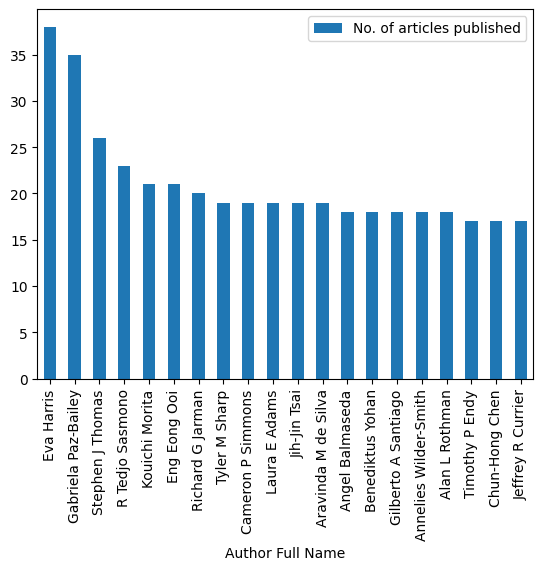

In [26]:
#create bar based on the authors with the top 10 articles between 2018 and 2024
articles_bar = top_20_articles.plot.bar(x = "Author Full Name", y = "No. of articles published")

### WHO WORKS WITH WHO

In [ ]:
#Number of researchers working on a paper

authors3 = authors_data.groupby('PMID')['AuthorN'].max().reset_index()
authors3.rename(columns={'AuthorN':'No. of researchers working on the article'})


,PMID,No. of researchers working on the article
0,10548291,2
1,10548309,4
2,10555454,4
3,10559263,2
4,10588771,5
...,...,...
9643,38081831,21
9644,38086397,9
9645,38090413,2
9646,38095160,4


In [ ]:
#Loaded the data
articles_data = pd.read_csv('articles.Dengue.csv')
authors_data = pd.read_csv('authors.Dengue.csv')
paper_count_data = pd.read_csv('paper_counts.csv')

In [ ]:
# Merging the articles and authors datasets on PMID to get a combined dataset
combined_data = pd.merge(authors_data, articles_data, on="PMID")

# Creating a dataframe to track collaborations
# For each article, we will have pairs of authors who have worked together
collaborations = []

for pmid in combined_data['PMID'].unique():
    authors_of_paper = combined_data[combined_data['PMID'] == pmid]
    authors_list = authors_of_paper[['AuthorForename', 'AuthorLastname']].values
    for i in range(len(authors_list)):
        for j in range(i + 1, len(authors_list)):
            author1 = f"{authors_list[i][0]} {authors_list[i][1]}"
            author2 = f"{authors_list[j][0]} {authors_list[j][1]}"
            collaborations.append([pmid, author1, author2])

# Creating a DataFrame for collaborations
collaborations_df = pd.DataFrame(collaborations, columns=['PMID', 'Author1', 'Author2'])

# Previewing the collaborations dataframe
collaborations_df


,PMID,Author1,Author2
0,10548291,E J Dechant,J G Rigau-Pérez
1,10548309,N Jirakanjanakit,M M Khin
2,10548309,N Jirakanjanakit,S Yoksan
3,10548309,N Jirakanjanakit,N Bhamarapravati
4,10548309,M M Khin,S Yoksan
...,...,...,...
296449,38095160,Marta Álvarez-García,Rocío Calvo Hernández
296450,38095160,Lola Otegui,Adriana Ortega Larrodé
296451,38095160,Lola Otegui,Rocío Calvo Hernández
296452,38095160,Adriana Ortega Larrodé,Rocío Calvo Hernández


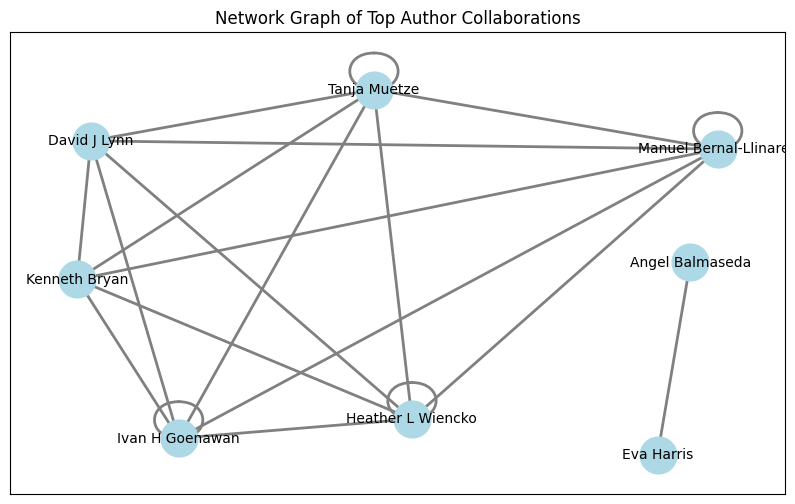

In [ ]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Counting the frequency of each collaboration pair
collaboration_counts = Counter(
    (author1, author2) for _, author1, author2 in collaborations
)

# Selecting the top collaborations for visualization
# For simplicity, let's take the top 20 collaborations
top_collaborations = collaboration_counts.most_common(20)

# Creating a network graph
G = nx.Graph()
for (author1, author2), count in top_collaborations:
    G.add_edge(author1, author2, weight=count)

# Drawing the network graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=50, iterations=20)
nx.draw_networkx(G, pos, node_size=700, font_size=10, width=2, edge_color='gray', node_color='lightblue')
plt.title('Network Graph of Top Author Collaborations')
plt.show()



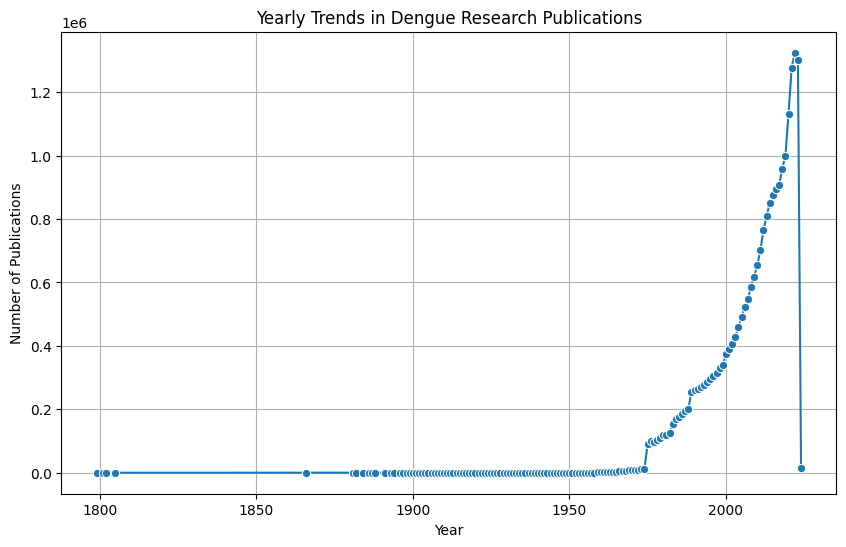

In [ ]:
# Visualization 1: Yearly Trends in Dengue Research Publications
plt.figure(figsize=(10, 6))
sns.lineplot(data=paper_count_data, x='Year', y='Count', marker='o')
plt.title('Yearly Trends in Dengue Research Publications')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

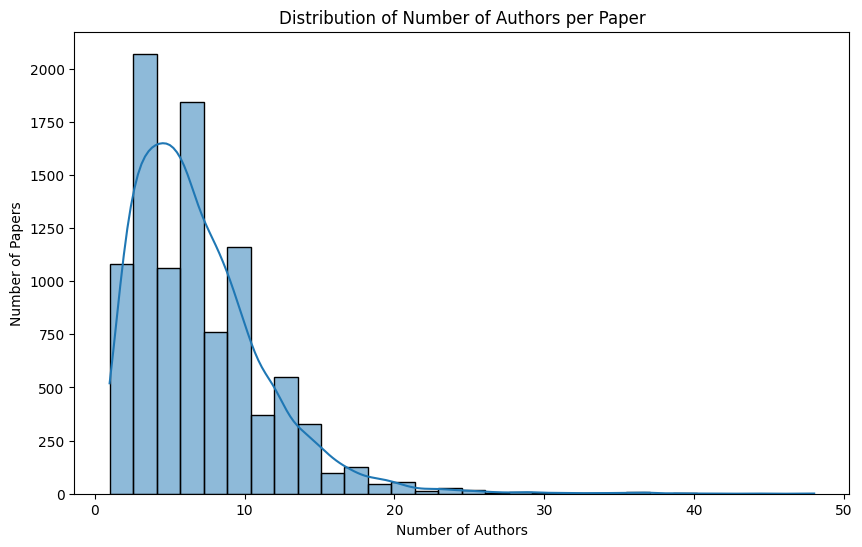

In [ ]:
# Visualization 4: Number of Authors per Paper
authors_per_paper = authors_data.groupby('PMID').size()
plt.figure(figsize=(10, 6))
sns.histplot(authors_per_paper, bins=30, kde=True)
plt.title('Distribution of Number of Authors per Paper')
plt.xlabel('Number of Authors')
plt.ylabel('Number of Papers')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming articles_data is your DataFrame and it's already loaded
top_journals = articles_data['Journal'].value_counts().head(10)

# Create a Plotly pie chart
fig = px.pie(top_journals, names=top_journals.index, values=top_journals.values,
             title='Top Research Journals for Dengue Publications',
             labels={'index': 'Journal', 'value': 'Number of Publications'})
#fig.update_traces(textinfo='percent+label')
fig.show()


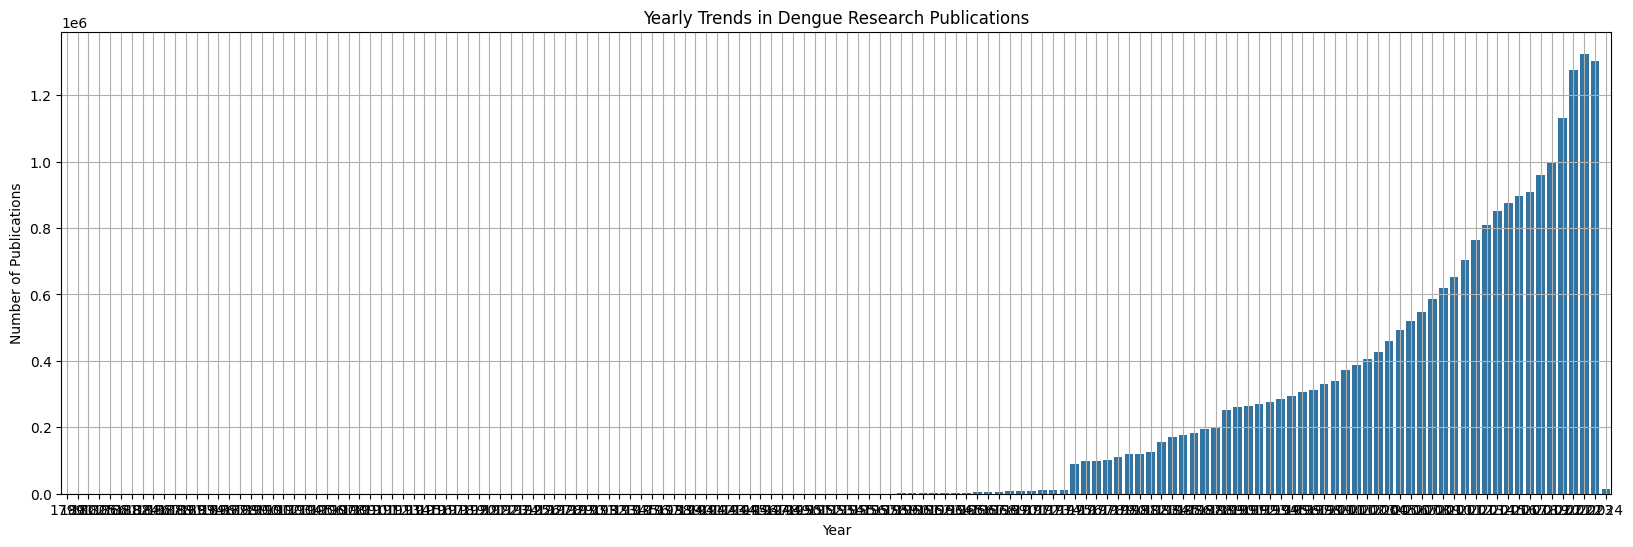

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming paper_counts_data is your DataFrame and it's already loaded
# Create a bar chart
plt.figure(figsize=(20, 6))
sns.barplot(data=paper_count_data, x='Year', y='Count')
plt.title('Yearly Trends in Dengue Research Publications')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


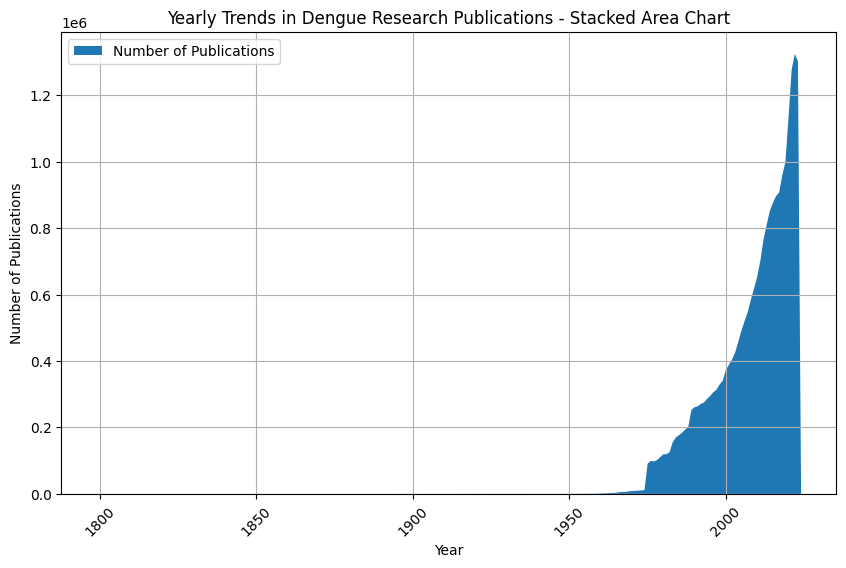

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming paper_counts_data is your DataFrame and it's already loaded
# Prepare data for a stacked area chart
years = paper_count_data['Year']
counts = paper_count_data['Count']

# Create a stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(years, counts, labels=['Number of Publications'])
plt.title('Yearly Trends in Dengue Research Publications - Stacked Area Chart')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


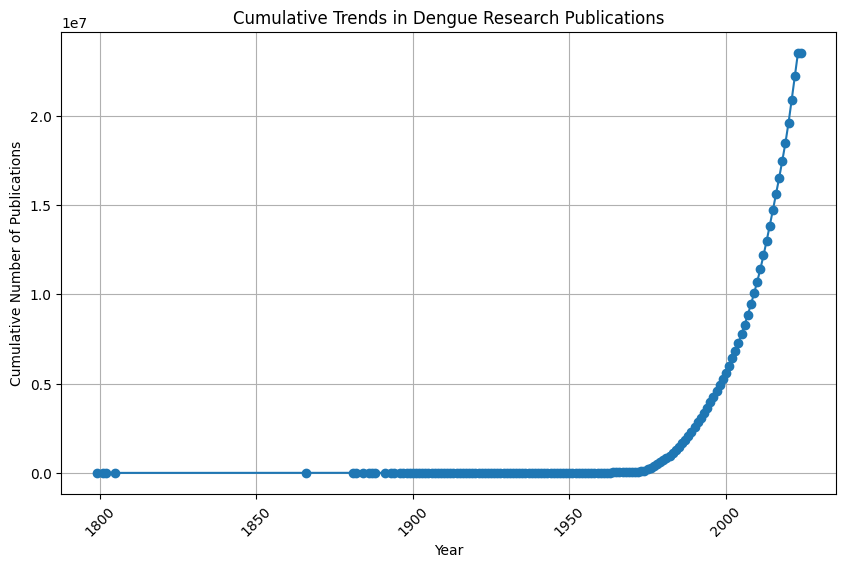

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming paper_counts_data is your DataFrame and it's already loaded
years = paper_count_data['Year']
counts = paper_count_data['Count'].cumsum()  # Calculate the cumulative sum of publications

# Create a cumulative line chart
plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='-')
plt.title('Cumulative Trends in Dengue Research Publications')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Publications')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
